# Open files ( scores & lat and lon)

In [31]:
    from osgeo import gdal
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
        
    src_lat='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lat_2.npy'
    lat_arr = np.array(np.load(src_lat))
    lat_arr = np.flipud(lat_arr)
    lat_arr_slice=lat_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]


    
    src_lon='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lon_2.npy'
    lon_arr = np.array(np.load(src_lon))
    lon_arr = np.flipud(lon_arr)
    lon_arr_slice=lon_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]

    print(lon_arr_slice.shape)

    

(1143, 5313)


# Deep learning Result

In [32]:
    #src_z='/Users/reem/Documents/DeepLearning/code/showResultOnMap/scores.npy'
    src_z='/Users/reem/Documents/DeepLearning/code/final_scores.npy'
    z_score_arr = np.array(np.load(src_z))
    z_score_arr = np.flipud(z_score_arr)

    score_slice=z_score_arr[400:1543 ,:]

# CCD Result 

In [33]:
filepath67 = r"/Users/reem/projAlaith/merged/interferograms/20181108_20181120/filt_fine.cor"
filepath68 = r"/Users/reem/projAlaith/merged/interferograms/20181120_20181202/filt_fine.cor"

ds67 = np.array(gdal.Open(filepath67).ReadAsArray())
ds68 = np.array(gdal.Open(filepath68).ReadAsArray())

CCD=np.subtract(ds67,ds68)
np.save('subtract_coh1108-1120-1202.npy', coh1)
CCD = np.flipud(CCD)

CCD_slice=CCD[400:1543 ,0:5313]

# Show in crypto

In [34]:
import sys
import os
import subprocess
import datetime
import platform

import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#from owslib.wmts import WebMapTileService
from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

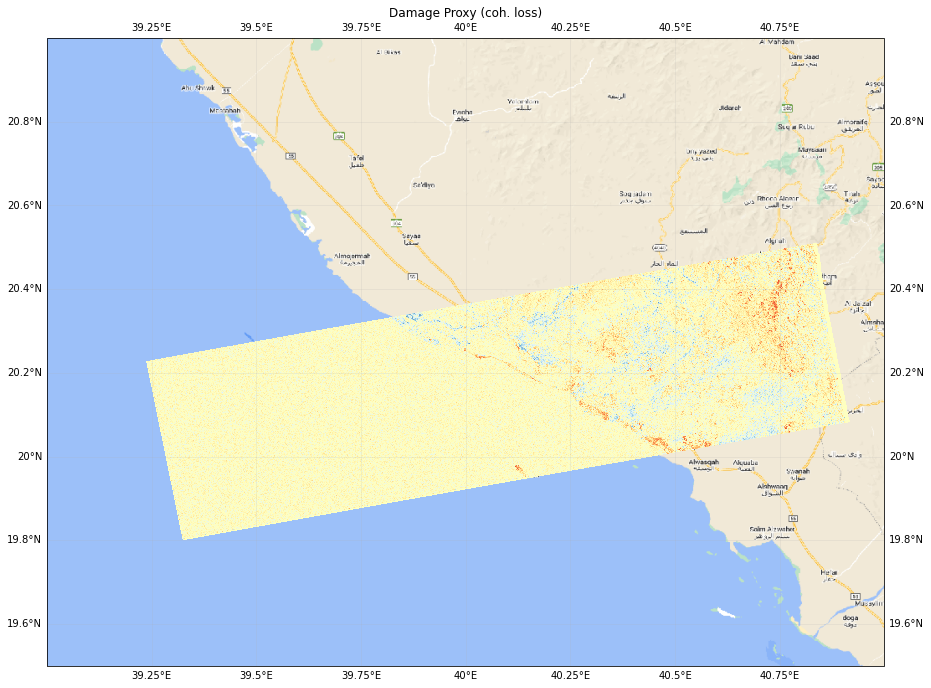

In [18]:
    fig = plt.figure(figsize=(15,20))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    tiler = GoogleTiles()
    mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 39, 41, 21, 19.5))

    zoom = 10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice,vmin=-1, vmax=1, cmap="RdYlBu") #vmin=-5, vmax=1
    ax.add_image(tiler, zoom )
   # ax.colorbar()  
    plt.title("Damage Proxy (coh. loss)") 
    #, transform='epsg:4326'
    plt.show()

/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/reem/opt/anaconda3/envs/isce2/lib/python3.8

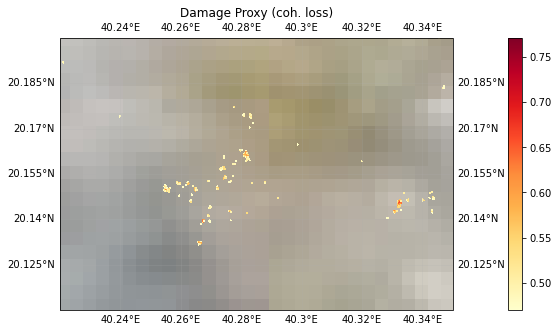

In [125]:
    from owslib.wmts import WebMapTileService

    # URL of NASA GIBS
    URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
    wmts = WebMapTileService(URL)

    # Layers for MODIS true color and snow RGB
    layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
              'MODIS_Terra_CorrectedReflectance_Bands367']

    date_str = '2017-02-12'
    
    fig = plt.figure(figsize=(20,5))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    #tiler = GoogleTiles()
    #mercator = tiler.crs    
    ax = plt.axes(projection=ccrs.PlateCarree())

    #ax.set_extent(( 39, 41, 21, 19.5))
    zoom = 10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    CCD_slice2 = np.ma.masked_array(CCD_slice, CCD_slice < 0.47)
    cmap = plt.cm.Reds 
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice2[:-1, :-1], cmap="YlOrRd") #vmin=-5, vmax=1
    #ax.add_image(tiler, zoom )
    plt.xlim(40.220,40.35)
    plt.ylim(20.110,20.200)
    ax.add_wmts(wmts, layers[0], wmts_kwargs={'time': date_str})

    plt.title("Damage Proxy (coh. loss)") 
    plt.colorbar()  
    #, transform='epsg:4326'
    plt.show()    
    
    
    

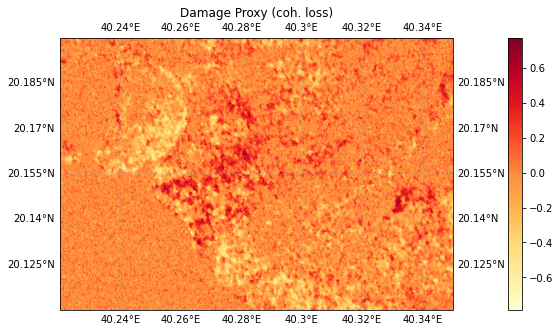

In [29]:
    fig = plt.figure(figsize=(20,5))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    tiler = GoogleTiles(style='satellite')
    mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 39, 41, 21, 19.5))

    zoom =10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    CCD_slice2 = np.ma.masked_array(CCD_slice, CCD_slice < 0.47)
    cmap = plt.cm.Reds 
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice2, cmap="YlOrRd") #vmin=-5, vmax=1
    ax.add_image(tiler, zoom )#, zoom 
    plt.xlim(40.220,40.35)
    plt.ylim(20.110,20.200)
    plt.title("Damage Proxy (coh. loss)") 
    plt.colorbar()  
    plt.savefig('CCD_cartopy_filter.tif')
    #, transform='epsg:4326'
    plt.show()

In [20]:
#"27Nov2018-001.tif"
from osgeo import gdal, osr

gdal.UseExceptions()


fname = '27Nov2018-001.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

PROJCS["WGS_1984_UTM_Zone_37N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",39],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32637"]]


In [21]:
import cartopy.crs as ccrs

#projcs = inproj.GetAuthorityCode('PROJCS')
#projection = ccrs.epsg(projcs)
#print(projection)

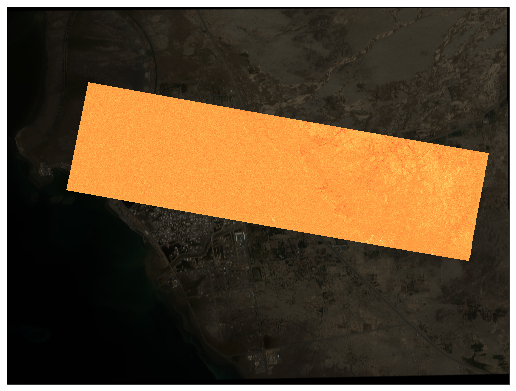

In [13]:

import matplotlib.pyplot as plt

subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (39, 41, 21, 19.5)

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent,
                origin='upper')

#plt.imshow('myimage.png', extent=(x0, x1, y0, y1), zorder=10)

#CCD_slice2 = np.ma.masked_array(CCD_slice, CCD_slice < 0.47)
#cmap = plt.cm.Reds 
lat_arr_slice = np.flipud(lat_arr_slice)
lon_arr_slice = np.flipud(lon_arr_slice)

plt.pcolormesh(lon_arr_slice,lat_arr_slice,score_slice, cmap="YlOrRd") #vmin=-5, vmax=

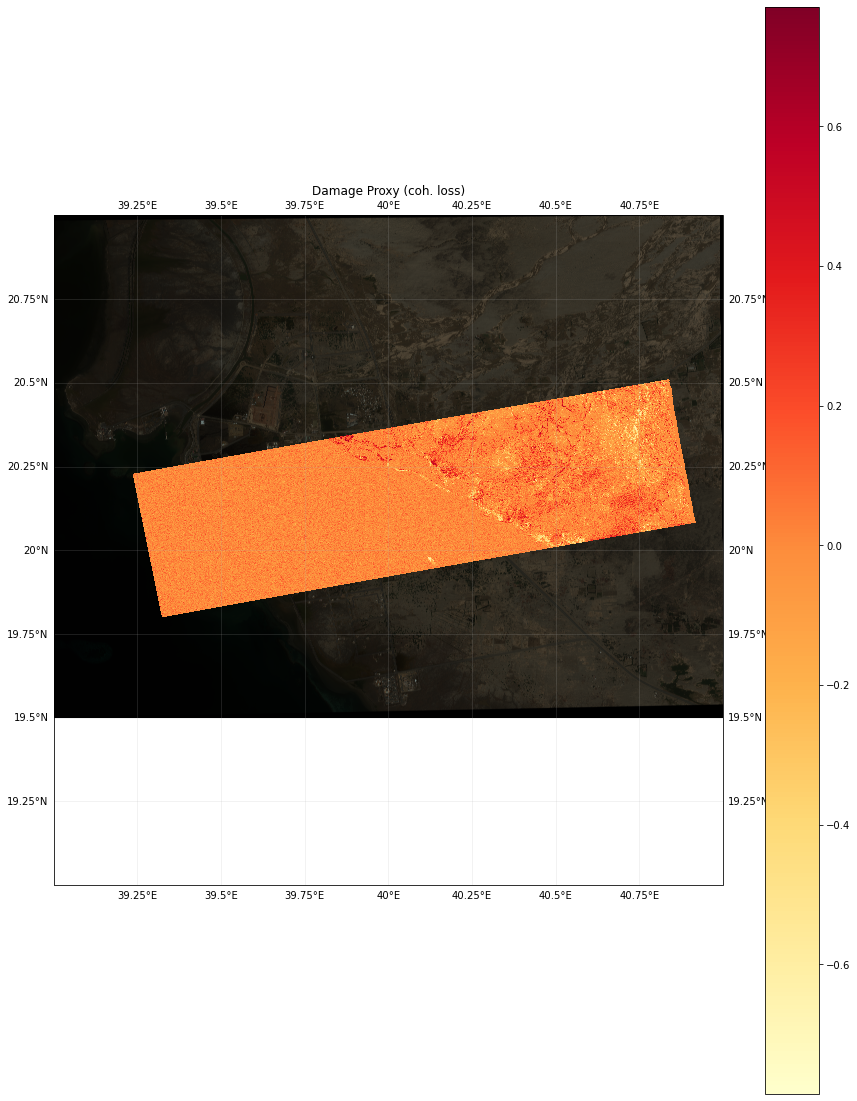

In [38]:
    fig = plt.figure(figsize=(15,20))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    #tiler = GoogleTiles()
    #mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 21, 19, 39, 41))

    zoom = 10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    CCD_slice2 = np.ma.masked_array(CCD_slice, CCD_slice < 0.47)
    cmap = plt.cm.Reds 
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice, cmap="YlOrRd") #vmin=-5, vmax=1
    ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent,origin='lower')
    plt.xlim(39,41)
    plt.ylim(19,21)
    plt.title("Damage Proxy (coh. loss)") 
    plt.colorbar()  
    #, transform='epsg:4326'
    plt.show()

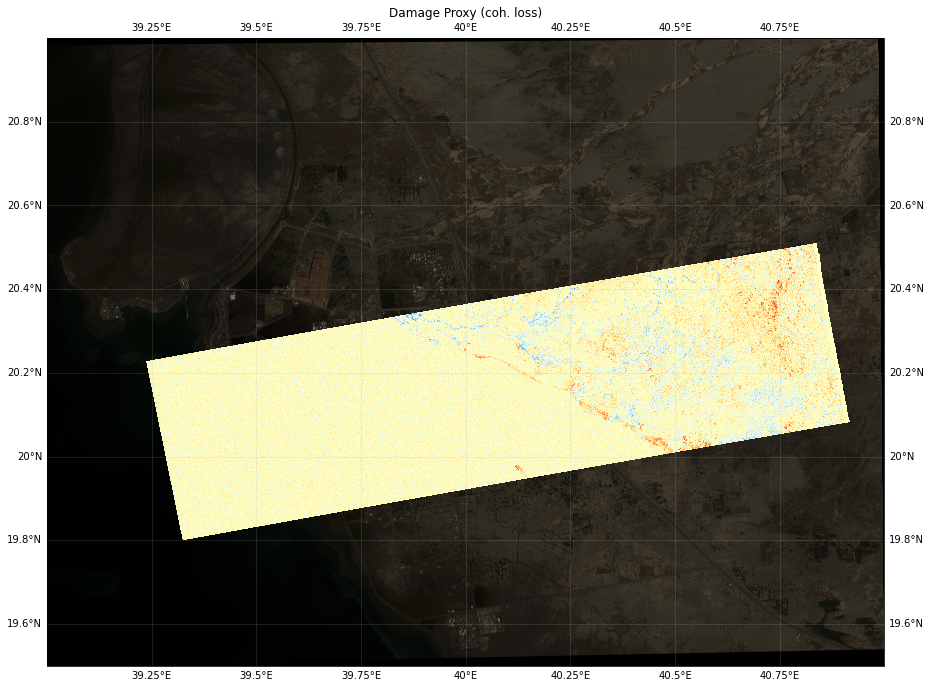

In [37]:
    fig = plt.figure(figsize=(15,20))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    tiler = GoogleTiles()
    mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 39, 41, 21, 19.5))
    extent = (39, 41, 21, 19.5)

    zoom = 10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice,vmin=-1, vmax=1, cmap="RdYlBu") #vmin=-5, vmax=1
    ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, zorder=0,origin='lower')
    #ax.add_image(tiler, zoom )
    
   # ax.colorbar()  
    plt.title("Damage Proxy (coh. loss)") 
    #, transform='epsg:4326'
    plt.show()